In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys
from PIL import Image

In [23]:
def erosion(image,kernel):



    kw,kh=kernel.shape
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih)).astype(np.float32)

    for i in range(iw):
        for j in range(ih):

            pixels = np.sum(imagepadded[i:i+kw,j:j+kh])

            if pixels  == kw*kh:
                output[i,j] = True
            else:
                output[i,j] = False

    return output

def dilation(image,kernel):

    kw,kh=kernel.shape
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih)).astype(np.float32)

    for i in range(iw):
        for j in range(ih):

            pixels = np.sum(imagepadded[i:i+kw,j:j+kh])

            if pixels > 0:
                output[i,j] = True
            else:
                output[i,j] = False

    return output

def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array

[[False False False ... False  True  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]]


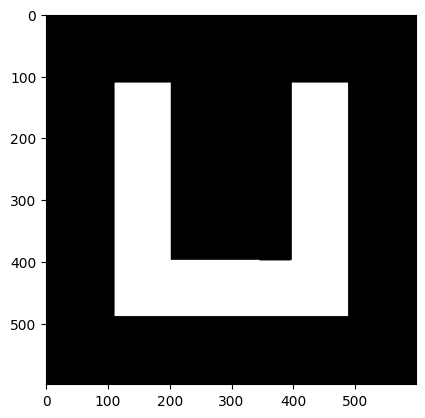

In [28]:
filepath = 'ushape.tif'
uimage = load_image_as_np_array(filepath)


arr = np.ones(shape=(50,50))*255.0

plt.imshow(erosion(uimage,arr),cmap='grey')